In [62]:
# splicing categories are pairwise (do they need a reference?)
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from venn import venn

from data_loading import load_annotated_6k_collection

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
tfs = load_annotated_6k_collection()

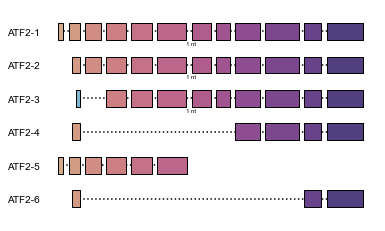

In [3]:
tfs['ATF2'].exon_diagram()

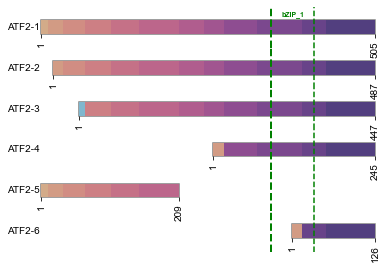

In [4]:
tfs['ATF2'].protein_diagram()

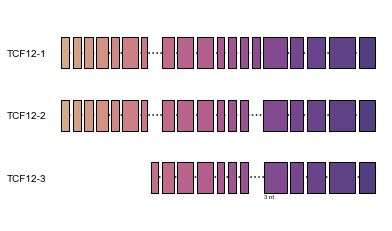

In [5]:
tfs['TCF12'].exon_diagram()

In [47]:
tfs['TCF12'].strand

'+'

In [56]:
# is this true?
tfs['TCF12'].alternative_3prime('TCF12-2', 'TCF12-3')

True

In [10]:
cats = {k: set() for k in ['alternative_start',
                           'alternative_stop',
                           'alternative_internal_exon',
                           'alternative_3prime',
                           'alternative_5prime']}
for tf in tfs.values():
    ref_iso = tf.orfs[0].name
    for alt_iso in [x.name for x in tf.orfs[1:]]:
        if tf.alternative_start(ref_iso, alt_iso):
            cats['alternative_start'].add((ref_iso, alt_iso))
        if tf.alternative_stop(ref_iso, alt_iso):
            cats['alternative_stop'].add((ref_iso, alt_iso))
        if tf.alternative_internal_exon(ref_iso, alt_iso):
            cats['alternative_internal_exon'].add((ref_iso, alt_iso))
        if tf.alternative_3prime(ref_iso, alt_iso):
            cats['alternative_3prime'].add((ref_iso, alt_iso))
        if tf.alternative_5prime(ref_iso, alt_iso):
            cats['alternative_5prime'].add((ref_iso, alt_iso))

In [11]:
for k, v in cats.items():
    print(k, len(v))

alternative_start 169
alternative_stop 194
alternative_internal_exon 209
alternative_3prime 223
alternative_5prime 188


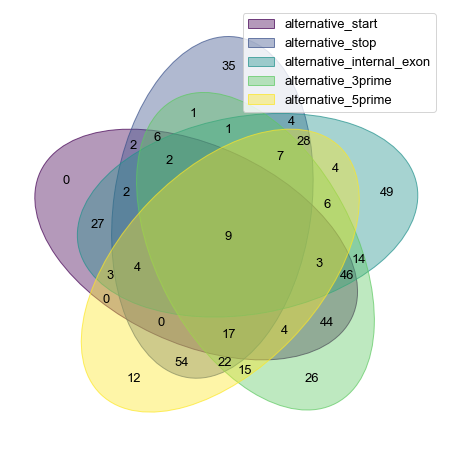

In [95]:
venn(cats)
plt.savefig('../../figures/splice-cat_venn.pdf',
            bbox_inches='tight')

In [63]:
# what are the alt. stops that don't have other cats???
cats['alternative_stop'].difference(set.union(*(v for k, v in cats.items() if k != 'alternative_stop')))

{('ATF3-1', 'ATF3-2'),
 ('ESR2-1', 'ESR2-2'),
 ('FOXP2-1', 'FOXP2-10'),
 ('GRHL3-1', 'GRHL3-3'),
 ('HSFY1-1', 'HSFY1-2'),
 ('MAX-1', 'MAX-5'),
 ('MITF-2', 'MITF-3'),
 ('NKX2-5-1', 'NKX2-5-2'),
 ('PATZ1-1', 'PATZ1-2'),
 ('PRDM5-1', 'PRDM5-3'),
 ('PRRX1-1', 'PRRX1-2'),
 ('ZBTB25-1', 'ZBTB25-4'),
 ('ZNF124-1', 'ZNF124-4'),
 ('ZNF174-1', 'ZNF174-3'),
 ('ZNF175-1', 'ZNF175-2'),
 ('ZNF177-1', 'ZNF177-2'),
 ('ZNF177-1', 'ZNF177-3'),
 ('ZNF24-1', 'ZNF24-2'),
 ('ZNF254-1', 'ZNF254-2'),
 ('ZNF264-1', 'ZNF264-3'),
 ('ZNF320-1', 'ZNF320-2'),
 ('ZNF451-2', 'ZNF451-3'),
 ('ZNF451-2', 'ZNF451-4'),
 ('ZNF451-2', 'ZNF451-5'),
 ('ZNF451-2', 'ZNF451-6'),
 ('ZNF451-2', 'ZNF451-7'),
 ('ZNF451-2', 'ZNF451-8'),
 ('ZNF473-1', 'ZNF473-2'),
 ('ZNF483-1', 'ZNF483-2'),
 ('ZNF544-1', 'ZNF544-6'),
 ('ZNF549-1', 'ZNF549-2'),
 ('ZNF599-1', 'ZNF599-3'),
 ('ZNF655-1', 'ZNF655-4'),
 ('ZNF688-2', 'ZNF688-5'),
 ('ZSCAN18-1', 'ZSCAN18-7')}

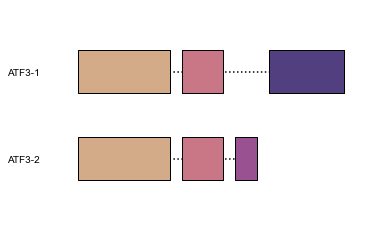

In [65]:
tfs['ATF3'].exon_diagram()

In [32]:
tfs['ATF2'].alternative_3prime('ATF2-1', 'ATF2-2')

True

In [9]:
# get m1h data and look for differences
from data_loading import load_m1h_activation_data

m1h = load_m1h_activation_data()
m1h.head()

,gene,clone_acc,M1H_rep1,M1H_rep2,M1H_rep3
360,AEBP2,AEBP2|2/3|05F03,0.241019,0.189211,0.473661
359,AEBP2,AEBP2|3/3|05E07,-0.276303,-0.305477,-0.121186
0,ARNT2,ARNT2|1/6|08C12,4.498733,4.501519,4.297244
1,ARNT2,ARNT2|2/6|09E01,2.407721,2.407411,2.197963
3,ARNTL2,ARNTL2|2/5|12C06,0.398027,0.391809,0.299461


In [14]:
from data_loading import load_y2h_isoform_data, load_y1h_pdi_data, load_valid_isoform_clones
from isoform_pairwise_metrics import pairs_of_isoforms_comparison_table

y2h = load_y2h_isoform_data()
y1h = load_y1h_pdi_data()
isoforms = load_valid_isoform_clones()
pairs = pairs_of_isoforms_comparison_table(isoforms=isoforms,
                                           y2h=y2h,
                                           y1h=y1h,
                                           m1h=m1h)

In [15]:
pairs.head()

,tf_gene_symbol,clone_acc_a,clone_acc_b,pair,ppi_n_tested,ppi_n_shared,ppi_n_min,ppi_n_min_diff,ppi_jaccard,ppi_simpson,ppi_n_diff,pdi_n_tested,pdi_n_shared,pdi_n_min,pdi_n_min_diff,pdi_jaccard,pdi_simpson,pdi_n_diff,activation_fold_change,aa_seq_pct_id
0,AEBP2,AEBP2|2/3|05F03,AEBP2|3/3|05E07,AEBP2|2/3|05F03_AEBP2|3/3|05E07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.535619,82.0
1,ARNT2,ARNT2|1/6|08C12,ARNT2|2/6|09E01,ARNT2|1/6|08C12_ARNT2|2/6|09E01,13.0,7.0,8.0,1.0,0.538462,0.875,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.094800,93.0
2,ARNT2,ARNT2|1/6|08C12,ARNT2|3/6|10D11,ARNT2|1/6|08C12_ARNT2|3/6|10D11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.7
3,ARNT2,ARNT2|2/6|09E01,ARNT2|3/6|10D11,ARNT2|2/6|09E01_ARNT2|3/6|10D11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.1
4,ARNTL,ARNTL|1/2|08H08,ARNTL|2/2|08E08,ARNTL|1/2|08H08_ARNTL|2/2|08E08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.3


In [26]:
pairs['iso_acc_a'] = pairs['clone_acc_a'].apply(lambda x: x.split('|')[0] + '-' + x.split('|')[1].split('/')[0])
pairs['iso_acc_b'] = pairs['clone_acc_b'].apply(lambda x: x.split('|')[0] + '-' + x.split('|')[1].split('/')[0])

In [17]:
cats.keys()

dict_keys(['alternative_start', 'alternative_stop', 'alternative_internal_exon', 'alternative_3prime', 'alternative_5prime'])

In [27]:
for cat_name, members in cats.items():
    pairs[cat_name] = pairs.apply(lambda x: (x['iso_acc_a'], x['iso_acc_b']) in members,
                                  axis=1)

In [28]:
pairs.head()

,tf_gene_symbol,clone_acc_a,clone_acc_b,pair,ppi_n_tested,ppi_n_shared,ppi_n_min,ppi_n_min_diff,ppi_jaccard,ppi_simpson,...,pdi_n_diff,activation_fold_change,aa_seq_pct_id,iso_acc_a,iso_acc_b,alternative_start,alternative_stop,alternative_internal_exon,alternative_3prime,alternative_5prime
0,AEBP2,AEBP2|2/3|05F03,AEBP2|3/3|05E07,AEBP2|2/3|05F03_AEBP2|3/3|05E07,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.535619,82.0,AEBP2-2,AEBP2-3,True,True,True,True,True
1,ARNT2,ARNT2|1/6|08C12,ARNT2|2/6|09E01,ARNT2|1/6|08C12_ARNT2|2/6|09E01,13.0,7.0,8.0,1.0,0.538462,0.875,...,NaN,2.094800,93.0,ARNT2-1,ARNT2-2,True,False,False,True,True
2,ARNT2,ARNT2|1/6|08C12,ARNT2|3/6|10D11,ARNT2|1/6|08C12_ARNT2|3/6|10D11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,95.7,ARNT2-1,ARNT2-3,False,True,False,False,True
3,ARNT2,ARNT2|2/6|09E01,ARNT2|3/6|10D11,ARNT2|2/6|09E01_ARNT2|3/6|10D11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,93.1,ARNT2-2,ARNT2-3,False,False,False,False,False
4,ARNTL,ARNTL|1/2|08H08,ARNTL|2/2|08E08,ARNTL|1/2|08H08_ARNTL|2/2|08E08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,90.3,ARNTL-1,ARNTL-2,True,False,True,True,False


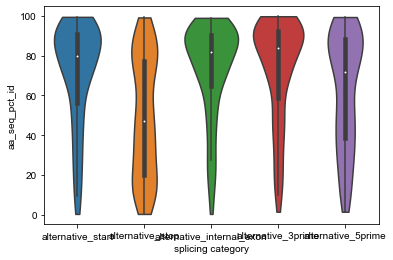

In [76]:
sns.violinplot(data=pd.DataFrame([(cat, v) for cat in cats.keys() 
                       for v in pairs.loc[pairs[cat], 'aa_seq_pct_id'].values], 
                    columns=['splicing category', 'aa_seq_pct_id']),
                x='splicing category',
                y='aa_seq_pct_id',
                cut=0)
plt.show()

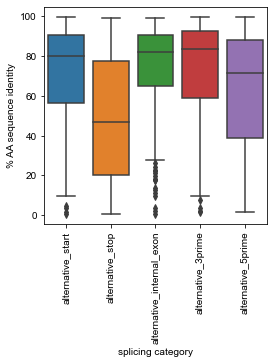

In [99]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
sns.boxplot(data=pd.DataFrame([(cat, v) for cat in cats.keys() 
                       for v in pairs.loc[pairs[cat], 'aa_seq_pct_id'].values], 
                    columns=['splicing category', '% AA sequence identity']),
                x='splicing category',
                y='% AA sequence identity',
                ax=ax)
ax.xaxis.set_tick_params(rotation=90)
plt.savefig('../../figures/aa-seq-id_by_splice-cat_box-plot.pdf',
            bbox_inches='tight')
plt.show()

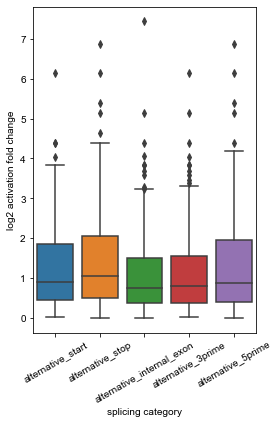

In [101]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 6)
sns.boxplot(data=pd.DataFrame([(cat, v) for cat in cats.keys() 
                       for v in pairs.loc[pairs[cat], 'activation_fold_change'].values], 
                    columns=['splicing category', 'log2 activation fold change']),
                x='splicing category',
                y='log2 activation fold change',
                ax=ax)
ax.xaxis.set_tick_params(rotation=30)
plt.savefig('../../figures/m1h-change_by_splice-cat_box-plot.pdf',
            bbox_inches='tight')
plt.show()
plt.show()

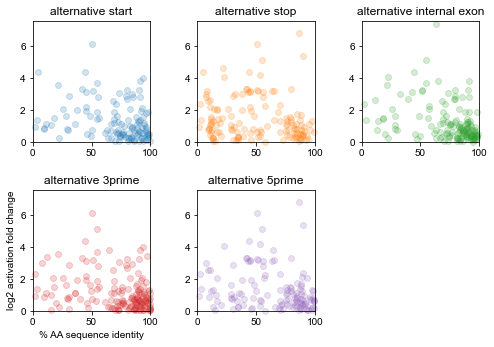

In [115]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(8, 8/3*2)
for i, (cat, ax) in enumerate(zip(cats.keys(), axs.flatten())):
    xy = pairs.loc[pairs[cat], ['aa_seq_pct_id', 'activation_fold_change']].dropna()
    ax.scatter(x=xy['aa_seq_pct_id'], y=xy['activation_fold_change'],
               alpha=0.2,
               clip_on=False,
               color='C' + str(i))
    ax.set_ylim(0, 7.6)
    ax.set_xlim(0, 100)
    ax.set_title(cat.replace('_', ' '))
axs[-1, -1].axis('off')
axs[-1, 0].set_xlabel('% AA sequence identity')
axs[-1, 0].set_ylabel('log2 activation fold change')
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig('../../figures/aa-seq_id_vs_m1h-change_by_splice-cat_scatter.pdf',
            bbox_inches='tight')

In [128]:
pairs['M1H_a'] = pairs['clone_acc_a'].map(m1h.set_index('clone_acc')[['M1H_rep1', 'M1H_rep2', 'M1H_rep3']].mean(axis=1))
pairs['M1H_b'] = pairs['clone_acc_b'].map(m1h.set_index('clone_acc')[['M1H_rep1', 'M1H_rep2', 'M1H_rep3']].mean(axis=1))

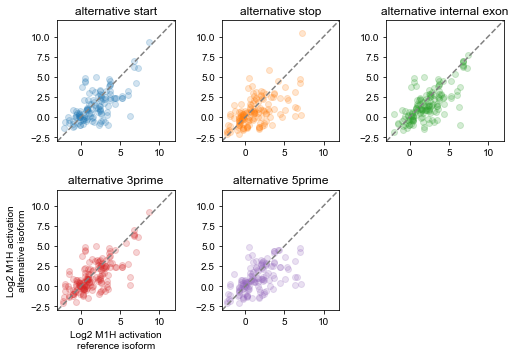

In [142]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(8, 8/3*2)
for i, (cat, ax) in enumerate(zip(cats.keys(), axs.flatten())):
    xy = pairs.loc[pairs[cat], ['M1H_a', 'M1H_b']].dropna()
    ax.scatter(x=xy['M1H_a'], y=xy['M1H_b'],
               alpha=0.2,
               clip_on=False,
               color='C' + str(i))
    ax.plot([-3, 12], [-3, 12], linestyle='--', color='grey')
    ax.set_ylim(-3, 12)
    ax.set_xlim(-3, 12)
    ax.set_title(cat.replace('_', ' '))
axs[-1, -1].axis('off')
axs[-1, 0].set_xlabel('Log2 M1H activation\nreference isoform')
axs[-1, 0].set_ylabel('Log2 M1H activation\nalternative isoform')
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig('../../figures/m1h-per-pair_by_splice-cat_scatter.pdf',
            bbox_inches='tight')

In [121]:
# look at examples where small change in aa sequence is large change in M1H


# FOXJ2-1	FOXJ2-2	
# TBPL1-1	TBPL1-2	
# NR4A1-1/2/3

pairs.loc[pairs['alternative_3prime']
          & (pairs['activation_fold_change'] > 3.), :].sort_values('aa_seq_pct_id', ascending=False)

,tf_gene_symbol,clone_acc_a,clone_acc_b,pair,ppi_n_tested,ppi_n_shared,ppi_n_min,ppi_n_min_diff,ppi_jaccard,ppi_simpson,...,pdi_n_diff,activation_fold_change,aa_seq_pct_id,iso_acc_a,iso_acc_b,alternative_start,alternative_stop,alternative_internal_exon,alternative_3prime,alternative_5prime
51,E2F8,E2F8|1/4|03G03,E2F8|2/4|03A06,E2F8|1/4|03G03_E2F8|2/4|03A06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.464671,97.0,E2F8-1,E2F8-2,False,False,False,True,False
299,NR4A1,NR4A1|1/5|03A04,NR4A1|2/5|03G05,NR4A1|1/5|03A04_NR4A1|2/5|03G05,1.0,1.0,1.0,0.0,1.0,1.0,...,NaN,4.029137,93.6,NR4A1-1,NR4A1-2,True,False,False,True,False
300,NR4A1,NR4A1|1/5|03A04,NR4A1|3/5|03G02,NR4A1|1/5|03A04_NR4A1|3/5|03G02,1.0,0.0,0.0,0.0,0.0,NaN,...,NaN,3.836445,91.6,NR4A1-1,NR4A1-3,True,False,True,True,False
792,ZNF778,ZNF778|1/2|05B07,ZNF778|2/2|12G05,ZNF778|1/2|05B07_ZNF778|2/2|12G05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.235406,90.6,ZNF778-1,ZNF778-2,True,False,True,True,False
61,ELF2,ELF2|1/4|03A11,ELF2|2/4|04E01,ELF2|1/4|03A11_ELF2|2/4|04E01,1.0,1.0,1.0,0.0,1.0,1.0,...,NaN,3.280586,79.8,ELF2-1,ELF2-2,True,False,True,True,False
50,E2F6,E2F6|1/2|10C02,E2F6|2/2|01A04,E2F6|1/2|10C02_E2F6|2/2|01A04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.075493,73.3,E2F6-1,E2F6-2,True,False,True,True,False
308,NR5A2,NR5A2|1/5|02A02,NR5A2|4/5|01F10,NR5A2|1/5|02A02_NR5A2|4/5|01F10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.840949,64.8,NR5A2-1,NR5A2-4,False,False,True,True,True
519,TFEC,TFEC|1/6|03F07,TFEC|6/6|03E11,TFEC|1/6|03F07_TFEC|6/6|03E11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.128960,55.0,TFEC-1,TFEC-6,False,True,True,True,True
33,CTCF,CTCF|1/2|10F11,CTCF|2/2|01E10,CTCF|1/2|10F11_CTCF|2/2|01E10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.680685,54.9,CTCF-1,CTCF-2,True,False,True,True,False
356,PPARG,PPARG|1/4|10G02,PPARG|3/4|01H02,PPARG|1/4|10G02_PPARG|3/4|01H02,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.180428,51.5,PPARG-1,PPARG-3,True,True,True,True,True


In [ ]:
# scatter of reference isoform vs alternative isoform M1H readout